#### Roll No: 31251

# Assignment-8

### Data Visualization I
#### 1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find any patterns in the data.
#### 2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.

# Assignment-9

### Data Visualization II
#### 1. Use the inbuilt dataset 'titanic' as used in the above problem. Plot a box plot for distribution of age with respect to each gender along with the information about whether they survived or not. (Column names : 'sex' and 'age')
#### 2. Write observations on the inference from the above statistics.

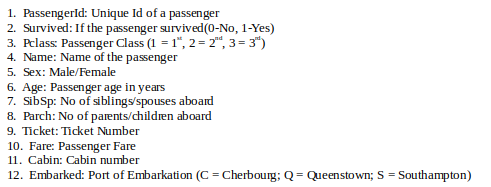

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(), inplace=True) #Replacing null values with mean

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


### Jointplot - Pclass vs Fare

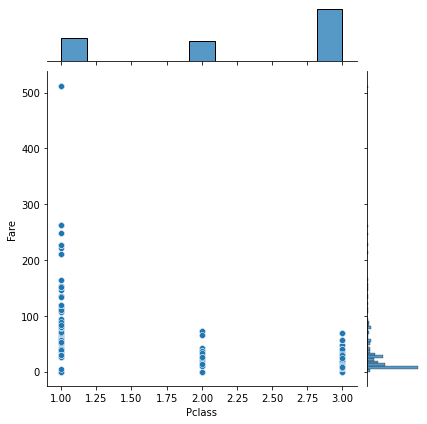

In [7]:
# Jointplot
sns.jointplot(x='Pclass', y='Fare', data=df)

#### Pclass-1 has highest fare.

### Jointplot - Fare vs Age

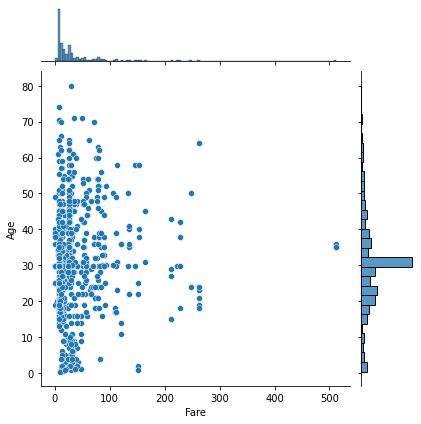

In [8]:
# Jointplot
sns.jointplot(x='Fare', y='Age', data=df)

#### Observation: Most people have bought cheap tickets. Most passengers on the ship were in the age group of 30-35.

### Histplot - Fare

Text(0.5, 1.0, 'Fare')

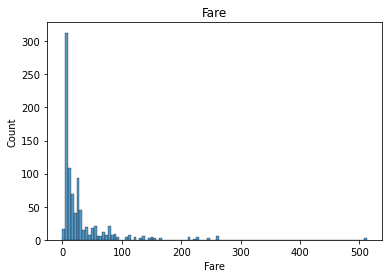

In [25]:
# Histplot
sns.histplot(df["Fare"]).set_title("Fare")

#### Observation: Most people had bought tickets pricing between 1 - 50.

### Heatmap

<AxesSubplot:>

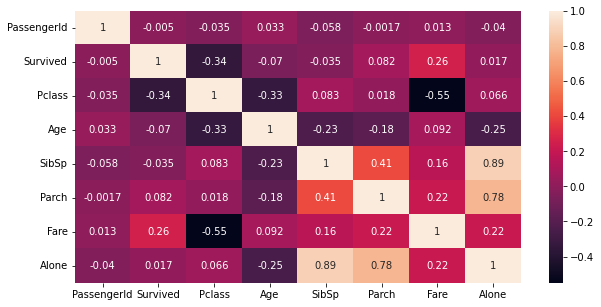

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

#### Observation: Pclass and Fare are highly correlated.

### Removing Outliers

In [11]:
Fare_Q1 = df['Fare'].quantile(0.25) #First quartile
Fare_Q3 = df['Fare'].quantile(0.75) #Third quartile
Fare_IQR = Fare_Q3 - Fare_Q1 #Inter quartile range
Fare_lower_limit = Fare_Q1 - 1.5 * Fare_IQR
Fare_upper_limit = Fare_Q3 + 1.5 * Fare_IQR
Fare_lower_limit, Fare_upper_limit

(-26.724, 65.6344)

In [12]:
df_without_outliers = df[(df['Fare']>Fare_lower_limit) & (df['Fare']<Fare_upper_limit)]
df_without_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

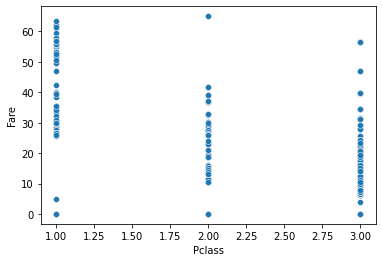

In [30]:
# Scatterplot
sns.scatterplot(x='Pclass', y='Fare', data=df_without_outliers)

#### Observation: Pclass-1 has highest fare and Pclass-3 has lowest fare.

### Jointplot - Embarked vs Fare

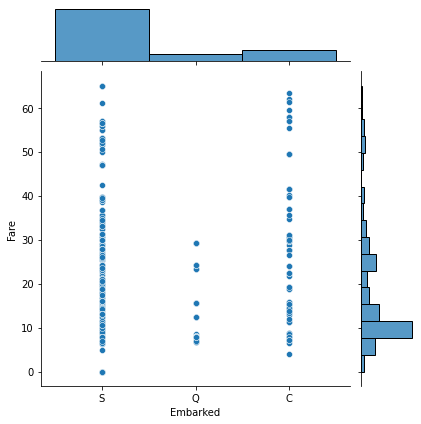

In [14]:
# Jointplot
sns.jointplot(x='Embarked', y='Fare', data=df_without_outliers)

#### Observation: Passengers having port of embarkation as Queenstown have paid cheapest fare. Most passengers had port of embarkation as Southampton.

Text(0.5, 1.0, 'Fare')

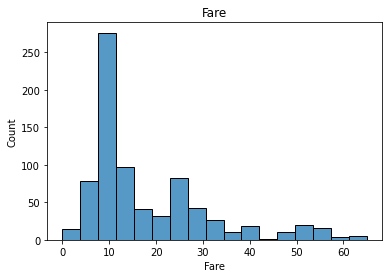

In [26]:
# Histplot
sns.histplot(df_without_outliers["Fare"]).set_title("Fare")

### Countplot - Sex vs Survived

<AxesSubplot:xlabel='Sex', ylabel='count'>

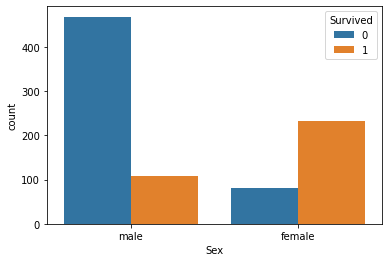

In [34]:
# Countplot
sns.countplot(x ="Sex", hue ="Survived", data = df)

#### Observation: Survival rate of female passengers is greater than male passengers.

### Histplot - Age vs Survived

Text(0.5, 1.0, 'Not Survived')

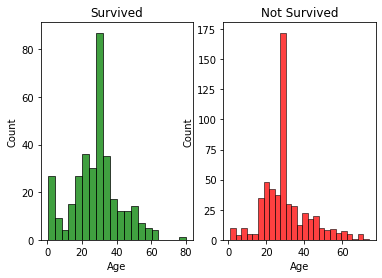

In [17]:
#Histplot
age_survived = df[df["Survived"] == 1]
age_not_survived = df[df["Survived"] == 0]

fig, axes = plt.subplots(1,2)
sns.histplot(age_survived["Age"], ax=axes[0], color='green').set_title("Survived")
sns.histplot(age_not_survived["Age"], ax=axes[1], color='red').set_title("Not Survived")

#### Observation: Most of the passengers were in the age group of 25-35. Passengers of younger age have more survival rate.

### Histplot - Alone vs Survived

Text(0.5, 1.0, 'Not Survived')

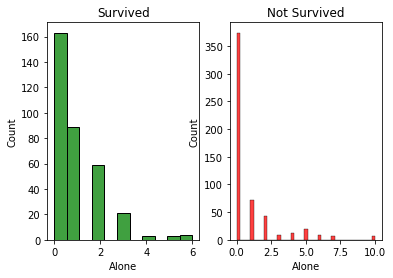

In [18]:
#Histplot
df['Alone'] = df.Parch + df.SibSp
alone_survived = df[df["Survived"] == 1]
alone_not_survived = df[df["Survived"] == 0]

fig, axes = plt.subplots(1,2)
sns.histplot(alone_survived["Alone"], ax=axes[0], color='green').set_title("Survived")
sns.histplot(alone_not_survived["Alone"], ax=axes[1], color='red').set_title("Not Survived")

#### Observation: Most passengers were travelling alone.

### Pairplot - Survived

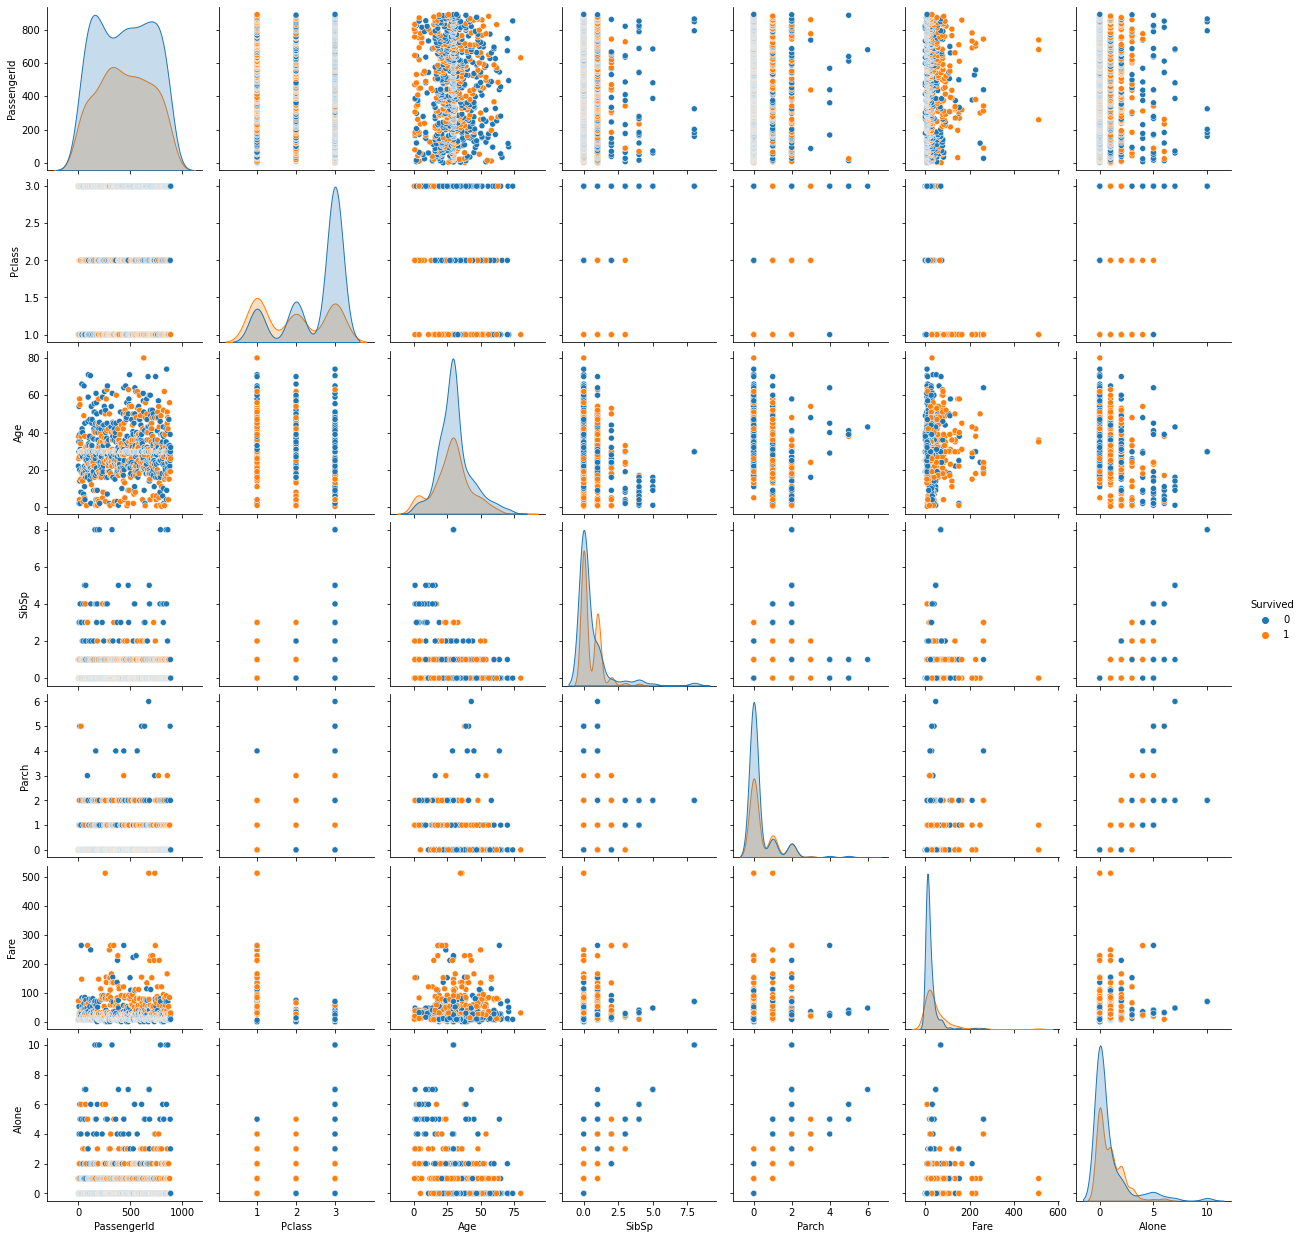

In [27]:
# Pairplot with hue survived
sns.pairplot(df, hue='Survived')

#### Observation: Shows relation between all attributes.

### Countplot - Pclass vs Survived

<AxesSubplot:xlabel='Pclass', ylabel='count'>

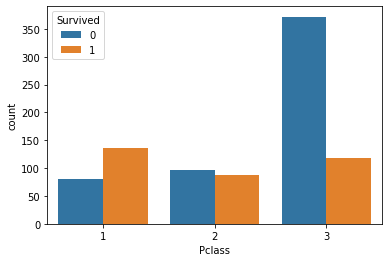

In [35]:
# Countplot
sns.countplot(x ="Pclass", hue ="Survived", data = df)

#### Observation: Most passengers died were in Pclass-3. Survival rate is high for Pclass-1.

### Lmplot - Age vs Survived

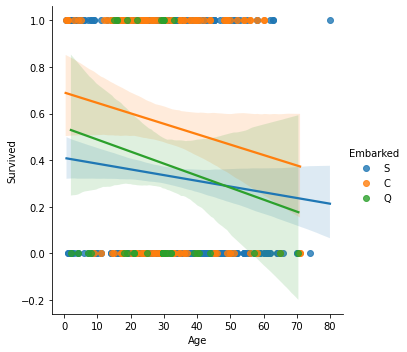

In [21]:
sns.lmplot(x='Age', y='Survived', data=df, hue='Embarked')

#### Observation: Passengers having port of embarkation Cherbourg have the highest survival rate.

### Boxplots

<AxesSubplot:xlabel='Age'>

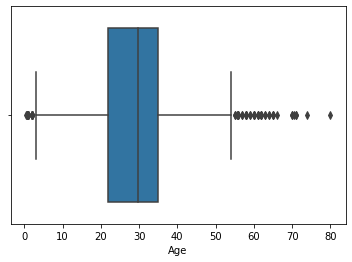

In [22]:
sns.boxplot(x=df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Sex'>

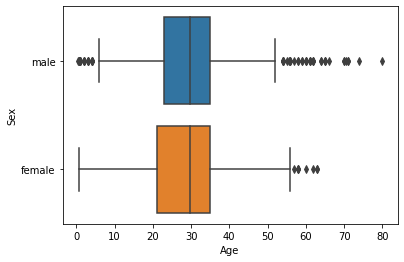

In [23]:
sns.boxplot(x=df['Age'], y=df['Sex'])

<AxesSubplot:xlabel='Age', ylabel='Sex'>

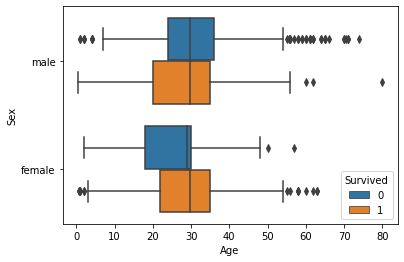

In [24]:
sns.boxplot(x=df['Age'], y=df['Sex'], hue=df['Survived'])

## Conclusion

### 1. Pclass-1 has the costliest fare.
### 2. Most people have bought tickets in Pclass-3 which has cheaper fare.
### 3. Passengers having port of embarkation as Queenstown have paid cheapest fare.
### 4. Most passengers had port of embarkation as Southampton.
### 5. Most passengers on the ship were in the age group of 30-35.
### 6. Survival rate of females is more as compared to males.
### 7. Younger passengers have more survival rate than older passengers.
### 8. Survival rate of Pclass-1 is more. Survival rate of Pclass-3 is very less.
### 9. Passengers having port of embarkation from Cherbourg have highest survival rate.
### 10. Most people were travelling alone.